In [ ]:
#importing libraries
import pandas as pd
import yfinance as yf


#providing the timeframe
start = "2014-10-01"
end = "2022-11-31"

#ticker name
ticker = 'MSFT'

yf.download(ticker)

**Solving above query or issue below**

In [ ]:
!pip install finnhub-python

In [3]:
import finnhub

# Setup client
finnhub_client = finnhub.Client(api_key="")

In [5]:
import finnhub

# Setup client
finnhub_client = finnhub.Client(api_key=" ")

def daily_data(Symbol, date_start, date_end):
    #converting date to int format
    start_timestamp = pd.Timestamp(date_start).timestamp()
    end_timestamp = pd.Timestamp(date_end).timestamp()
    start_date =int(start_timestamp)
    end_date =  int(end_timestamp)

    #reading it into dataframe
    Data = pd.DataFrame(finnhub_client.stock_candles(Symbol, "D", start_date, end_date))
    Data = Data[['c', 'h', 'l', 'o', 't', 'v']]
    Data.columns = ['Close', 'High', 'Low', 'Open', 'Date', 'Volume']
    Data['Date'] = Data['Date'].map(lambda x: pd.to_datetime(x, unit='s').date())
    Data['Symbol'] = Symbol
    Data = Data[['Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    return Data


Symbol = "GE"
date_start = "Jan 01 2015"
date_end = "30 12 2020"

#calling the function 
Data = daily_data(Symbol, date_start, date_end)

Data.head()

C:\Users\ManojKumar\AppData\Local\Temp\ipykernel_12336\632489666.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  end_timestamp = pd.Timestamp(date_end).timestamp()


,Symbol,Date,Open,High,Low,Close,Volume
0,GE,2015-01-02,118.704762,119.266823,116.503357,117.393286,6.552443e+06
1,GE,2015-01-05,117.159094,117.159094,114.863388,115.238095,6.730565e+06
2,GE,2015-01-06,114.582358,115.097580,112.099922,112.755660,1.020956e+07
3,GE,2015-01-07,113.411397,114.254489,112.334114,112.802498,6.988251e+06
4,GE,2015-01-08,113.926620,114.207650,113.036690,114.160812,6.921305e+06


In [6]:
Data.isnull().sum()

Symbol    0
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

**Obtaining multiple ticker data**

In [ ]:
def daily_data(symbols, date_start, date_end):
    data_list = []  # List to store data for multiple symbols
    
    # Converting date to int format
    start_timestamp = pd.Timestamp(date_start).timestamp()
    end_timestamp = pd.Timestamp(date_end).timestamp()
    start_date = int(start_timestamp)
    end_date = int(end_timestamp)

    for symbol in symbols:
        # Reading data for each symbol into a dataframe
        data = pd.DataFrame(finnhub_client.stock_candles(symbol, "D", start_date, end_date))
        data = data[['c', 'h', 'l', 'o', 't', 'v']]
        data.columns = ['Close', 'High', 'Low', 'Open', 'Date', 'Volume']
        data['Date'] = data['Date'].map(lambda x: pd.to_datetime(x, unit='s').date())
        data['Symbol'] = symbol
        data = data[['Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
        
        # Appending the symbol's data to the list
        data_list.append(data)
    
    # Combining data for all symbols into a single dataframe
    combined_data = pd.concat(data_list)
    
    return combined_data


symbols = ['BAC', 'C', 'GS', 'JPM','MS', 'WFC' ]  # Example list of symbols
start_date = '2006-01-01'
end_date = '2023-01-01'

result = daily_data(symbols, start_date, end_date)


# Pivot the DataFrame
pivot_df = result.pivot_table(index='Date', columns='Symbol')
pivot_df = pivot_df.swaplevel(axis=1)
pivot_df = pivot_df.sort_index(axis=1)
pivot_df

In [108]:
import seaborn as sns
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


<AxesSubplot:xlabel='Date', ylabel='Close'>

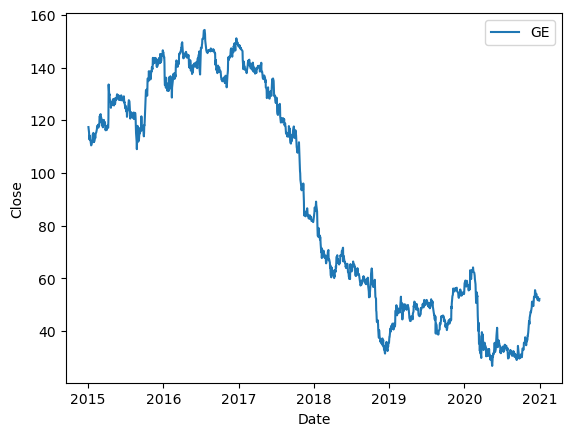

In [109]:
sns.lineplot(x='Date', y='Close', data=Data, label=Symbol)

**Normalizing the Value to 100**

In [110]:
Data['Close'].iloc[0]

117.39328649492583

In [113]:
#normalized closing price of share by dividing the each day price with the first price or starting price
Norm = Data[['Date','Close']]
Norm['Normalised'] = Data['Close'].div(Data['Close'].iloc[0]).mul(100)

C:\Users\ManojKumar\AppData\Local\Temp\ipykernel_9592\3351806966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Norm['Normalised'] = Data['Close'].div(Data['Close'].iloc[0]).mul(100)


<AxesSubplot:xlabel='Date', ylabel='Normalised'>

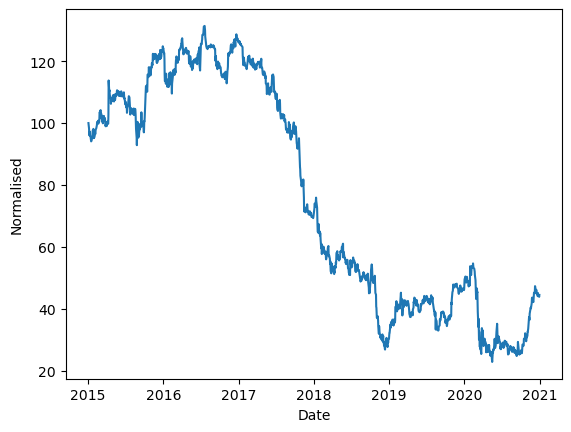

In [115]:
sns.lineplot(x='Date',y='Normalised', data=Norm)